# Problem Statement
## Develop a machine learning method to predict stock price based on past price variation.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Loading dataset 

In [3]:
df = pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


### checking count of values which are null

In [5]:
df.isnull().value_counts()

Date   Open   High   Low    Last   Close  Total Trade Quantity  Turnover (Lacs)
False  False  False  False  False  False  False                 False              1235
dtype: int64

### setting index as date

In [62]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


### visualizing data

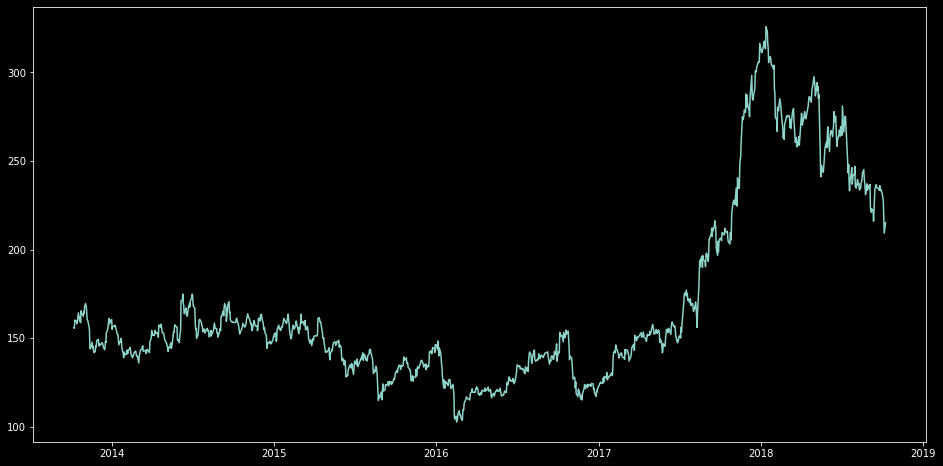

In [88]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

### creating dataframe 

In [67]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
new_data

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1230,NaN,NaN
1231,NaN,NaN
1232,NaN,NaN
1233,NaN,NaN


   ### copying each element of date and close of df to new df

In [68]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


### making date as new index

In [69]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [76]:
new_data

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


### creating train and test sets

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
dataset = new_data.values

### converting dataset into x_train and y_train

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [52]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [53]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### create and fit the LSTM network

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [55]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

927/927 - 16s - loss: 8.8692e-04


### predicting 246 values, using past 60 from the train data

In [57]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [58]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [59]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [60]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Close          8.893604
Predictions    9.439907
dtype: float64

### for visualizing result

D:\Softwares\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


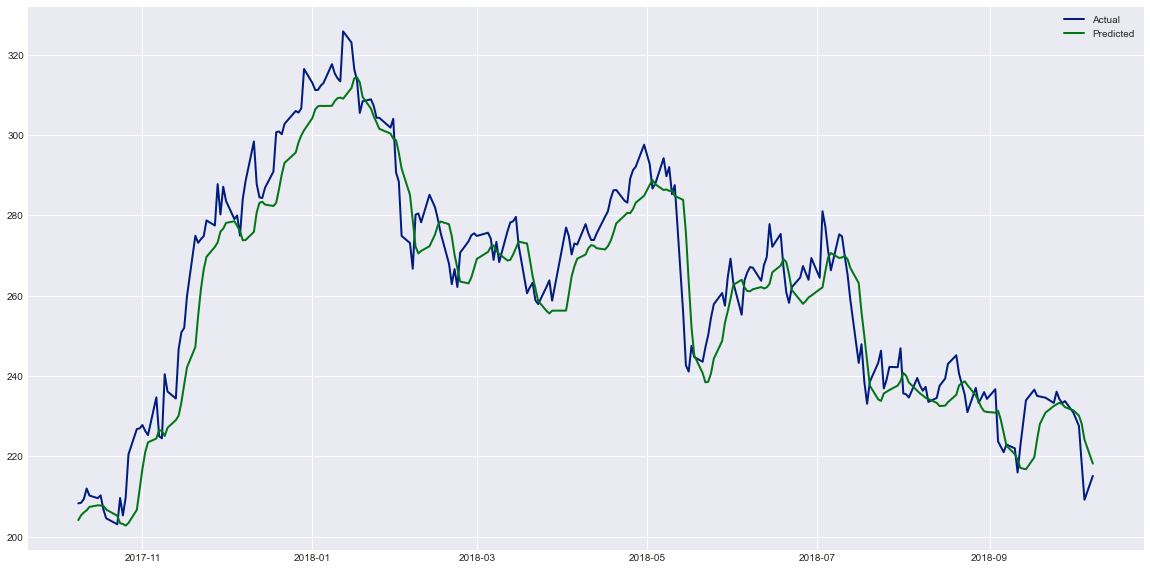

In [135]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(20,10))
plt.plot(valid[['Close']],label = 'Actual')
plt.plot(valid[['Predictions']],label = 'Predicted')
plt.legend()
plt.savefig("result.png")